In [159]:
from jupyter_cms.loader import load_notebook

eda = load_notebook('./data_exploration.ipynb')

df, newspapers = eda.load_data()

In [160]:
import pandas as pd

pd.set_option('display.max_columns', 100)

df.head(2)

,text,fontface,fontsize,bbox_left,bbox_bottom,bbox_right,bbox_top,bbox_area,avg_character_area,percent_of_page,page,page_width,page_height,page_area,date,day_of_week,weekend,slug,id,page_height_round,page_width_round,page_width_round_10,page_height_round_10,aspect_ratio
948,GET YOUR TICKETS!,SalvoSansExtraCond-Black,28.665,197.963,1413.262,352.508,1441.927,4430.032425,262.598379,0.004117,1,729.0,1476.0,1076004.0,2017-12-04,0,False,AL_TN,949,1476,729,720,1470,0.5
949,Styx is returning to the \nTuscaloosa Amphithe...,SalvoSans-Bold,14.250,197.963,1352.900,338.523,1411.150,8187.620000,76.041081,0.007609,1,729.0,1476.0,1076004.0,2017-12-04,0,False,AL_TN,950,1476,729,720,1470,0.5


In [128]:
dc = df[df.slug == 'DC_WP']
lat = df[df.slug == 'CA_LAT']
lat.shape

(13727, 24)

In [134]:
from datetime import datetime

lat[lat.date == datetime(2017, 10, 20)]

text                    32
fontface                32
fontsize                32
bbox_left               32
bbox_bottom             32
bbox_right              32
bbox_top                32
bbox_area               32
avg_character_area      32
percent_of_page         32
page                    32
page_width              32
page_height             32
page_area               32
date                    32
day_of_week             32
weekend                 32
slug                    32
id                      32
page_height_round       32
page_width_round        32
page_width_round_10     32
page_height_round_10    32
aspect_ratio            32
dtype: int64

In [136]:
newspapers[newspapers.city == "Worcester"]

,city,country,latitude,longitude,slug,state,title,website
212,Worcester,USA,42.2621,-71.80217,MA_TG,MA,Telegram & Gazette,http://www.telegram.com


In [207]:
def print_row(i, row):
    print("#{i}: {title} — {date:%b. %-d} — {fontsize:.2f}pt".format(
        i=i + 1,
        title=" ".join(row.text.split()),
        date=row.date,
        fontsize=row.fontsize))
    #print('Text: ' + ' '.join(row.text.split()))
    #print("Date: {:%Y-%m-%d} ({})".format(row.date, ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"][row.day_of_week]))
    #print("Font: {} (size: {})".format(row.fontface, row.fontsize))
    
def largest_font_headlines(npdf, paper):
    npdf = npdf[(npdf.bbox_top > npdf.page_height / 2) & (npdf.month >= 6)]
    top = npdf.sort_values(by='fontsize', ascending=False).head(20)
    print(paper)
    for i, (_, row) in enumerate(top.iterrows()):
        print_row(i, row)

def largest_area_headlines(npdf, paper):
    npdf = npdf[(npdf.bbox_top > npdf.page_height / 2) & (npdf.fontsize > 20)]
    top = npdf.sort_values(by='percent_of_page', ascending=False).head(10)
    print(paper)
    for i, (_, row) in enumerate(top.iterrows()):
        print("#{}".format(i + 1))
        print_row(row)

In [165]:
df['month'] = df['date'].apply(lambda x: x.month)

In [170]:
largest_per_day = df.groupby(['date', 'slug']).fontsize.max()

In [180]:
df_largest = largest_per_day.reset_index()

In [177]:
slugs_of_interest = [
    'WSJ',
    'USAT',
    'CA_LAT',
    'CA_MN',
    'NY_DN',
    'DC_WP',
    'IL_CST',
    'CO_DP',
    'IL_CT',
    'TX_DMN'
]

In [181]:
df_largest_care = df_largest[df_largest.slug.isin(slugs_of_interest)]

In [182]:
df_largest_care.head()

,date,slug,fontsize
27,2017-04-01,CA_LAT,81.300
33,2017-04-01,CA_MN,72.000
60,2017-04-01,CO_DP,73.656
82,2017-04-01,DC_WP,52.290
134,2017-04-01,IL_CST,194.157


In [185]:
from plotnine import *

(array([  16.,    2.,   18.,  156.,    0.,    3.,    1.,    0.,    0.,    1.]),
 array([ 39.142 ,  44.6463,  50.1506,  55.6549,  61.1592,  66.6635,
         72.1678,  77.6721,  83.1764,  88.6807,  94.185 ]),
 <a list of 10 Patch objects>)

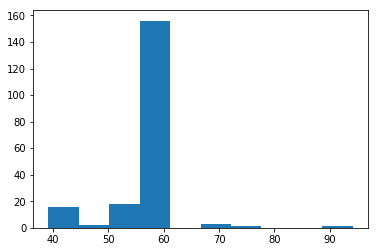

In [183]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(df_largest_care[df_largest_care.slug == 'WSJ'].fontsize)

In [199]:
df_largest_care.to_csv('~/data/fontsizes.csv', index=False)

In [ ]:
newspapers.to_csv('~/data/newspapers.csv', index=False)

In [208]:
largest_font_headlines(df[(df.slug == 'WSJ') & (df.date != datetime(2017, 12, 18))], 'The Wall Street Journal')

print()

largest_font_headlines(df[df.slug == 'USAT'], 'USA Today')

print()

largest_font_headlines(df[df.slug == 'CA_LAT'], 'Los Angeles Times')

print()

largest_font_headlines(df[df.slug == 'CA_MN'], 'San Jose Mercury News')

print()

largest_font_headlines(df[df.slug == 'NY_DN'], 'New York Daily News')

print()

largest_font_headlines(df[df.slug == 'DC_WP'], 'The Washington Post')

print()

largest_font_headlines(df[df.slug == 'IL_CST'], 'Chicago Sun Times')

print()

largest_font_headlines(df[df.slug == 'CO_DP'], 'The Denver Post')

print()

largest_font_headlines(df[df.slug == 'IL_CT'], 'Chicago Tribune')

print()

largest_font_headlines(df[df.slug == 'TX_DMN'], 'The Dallas Morning News')

The Wall Street Journal
#1: ‘It Was Just a Kill Box’ — Oct. 3 — 72.30pt
#2: Terror Strikes Barcelona — Aug. 18 — 67.36pt
#3: Terror Rampage in New York — Nov. 1 — 67.36pt
#4: Rain, Floods Deluge Texas — Aug. 28 — 67.36pt
#5: Battle Lines Drawn on Health Care — Jun. 23 — 56.15pt
#6: Trump Threatens to End Iran Deal — Oct. 14 — 56.15pt
#7: Hiring Growth Powers Economy — Dec. 9 — 56.15pt
#8: Senate Passes Budget Plan — Oct. 20 — 56.15pt
#9: Franken Bows to Pressure — Dec. 8 — 56.15pt
#10: Bankers Uneasy on Inflation — Oct. 16 — 56.15pt
#11: ‘Trump Trade’ Rebounds — Sep. 30 — 56.15pt
#12: Bipartisan Health Bill Gains Steam — Oct. 18 — 56.15pt
#13: Jerusalem Move Stokes Tensions — Dec. 7 — 56.15pt
#14: Trump Stresses GOP Unity — Oct. 17 — 56.15pt
#15: Dow Races Through 23000 — Oct. 19 — 56.15pt
#16: Firms Press for Tax Breaks — Dec. 5 — 56.15pt
#17: Kabul Bomb Sows Carnage — Jun. 1 — 56.15pt
#18: Firebrand Wins in Alabama — Sep. 27 — 56.15pt
#19: P&G Claims Win, but Peltz Presses On — Oct. 

#12: Showing a pulse — Oct. 19 — 90.00pt
#13: FALL ARTS PR Abc PREVIEW — Sep. 3 — 90.00pt
#14: 26 killed in Texas church — Nov. 6 — 89.10pt
#15: Trump: U.S. out of pact — Jun. 2 — 89.10pt
#16: Easy to queasy — Oct. 12 — 88.80pt
#17: THE SHOOTER’ — Oct. 4 — 88.00pt
#18: ‘WE NEED TO STOP — Oct. 4 — 88.00pt
#19: ‘COWARDLY ACT OF TERROR’ KILLS 8 — Nov. 1 — 88.00pt
#20: UP AGAINST — Oct. 18 — 87.60pt

The Dallas Morning News
#1: ‘Horriﬁ c tragedy’ — Nov. 6 — 134.74pt
#2: Moments in history — Jul. 7 — 129.98pt
#3: Only the start — Aug. 27 — 116.99pt
#4: Devastating deluge — Aug. 28 — 113.46pt
#5: Starting to dig out — Sep. 1 — 113.46pt
#6: Helping hands — Aug. 29 — 113.46pt
#7: American carnage — Oct. 3 — 108.73pt
#8: Harvey slams ashore — Aug. 26 — 107.52pt
#9: 3 dead after racial clashes in Virginia — Aug. 13 — 106.40pt
#10: Irma jukes, jabs — Sep. 10 — 106.36pt
#11: Menacing ﬂ oodwaters — Sep. 2 — 104.01pt
#12: MADE WHOLE — Jul. 16 — 103.28pt
#13: Faith beyond walls — Sep. 4 — 102.83pt
#1

In [163]:
newspapers[newspapers.city.str.contains('Dallas')]

,city,country,latitude,longitude,slug,state,title,website
496,Dallas,USA,32.776001,-96.806183,TX_DMN,TX,The Dallas Morning News,http://www.dallasnews.com
